In [1]:
import requests

url = "http://127.0.0.1:8000/"

payload = {}
files=[
  ('data',('testimg.jpg',open('testimg.jpg','rb'),'image/jpeg'))
]
headers = {
  'accept': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload, files=files)

print(response.text)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
response.text

'{"Prediction":"[[[[3.4256323327821325e-28, 0.0, 2.6767889546134227e-25, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 3.3389671774244657e-38, 0.0, 0.0, 1.0], [0.0, 0.0, 4.944222691359432e-32, 0.0, 0.0, 1.0], [0.0, 0.0, 5.1508025874500584e-30, 0.0, 0.0, 1.0], [7.709920653742494e-36, 0.0, 2.026639958626976e-22, 0.0, 0.0, 1.0], [2.8546033127267195e-34, 0.0, 1.5879329522169492e-22, 0.0, 0.0, 1.0], [4.067613883506317e-31, 0.0, 5.463699999480159e-18, 0.0, 0.0, 1.0], [3.130712104302245e-33, 0.0, 2.9342462657536065e-22, 0.0, 0.0, 1.0], [1.9972657006876495e-32, 0.0, 4.8976801844942174e-20, 0.0, 0.0, 1.0], [2.4945421108019934e-36, 0.0, 1.816901232157607e-25, 0.0, 0.0, 1.0], [1.4296188094243886e-35, 0.0, 2.0326160848550044e-23, 0.0, 0.0, 1.0], [0.0, 0.0, 2.3671703650373166e-28, 0.0, 0.0, 1.0], [3.144288705411519e-38, 0.0, 7.4

In [3]:
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np

In [4]:
pre = json.loads(response.text)

In [23]:
yhat = np.array(json.loads(pre['Prediction']))
yhat = np.squeeze(np.where(yhat > 0.3, 1.0, 0.0))

In [26]:
yhat.shape

(256, 256, 6)

In [28]:
x.shape

(256, 256, 3)

In [24]:
x = cv2.imread('testimg.jpg')

TypeError: Image data of dtype object cannot be converted to float

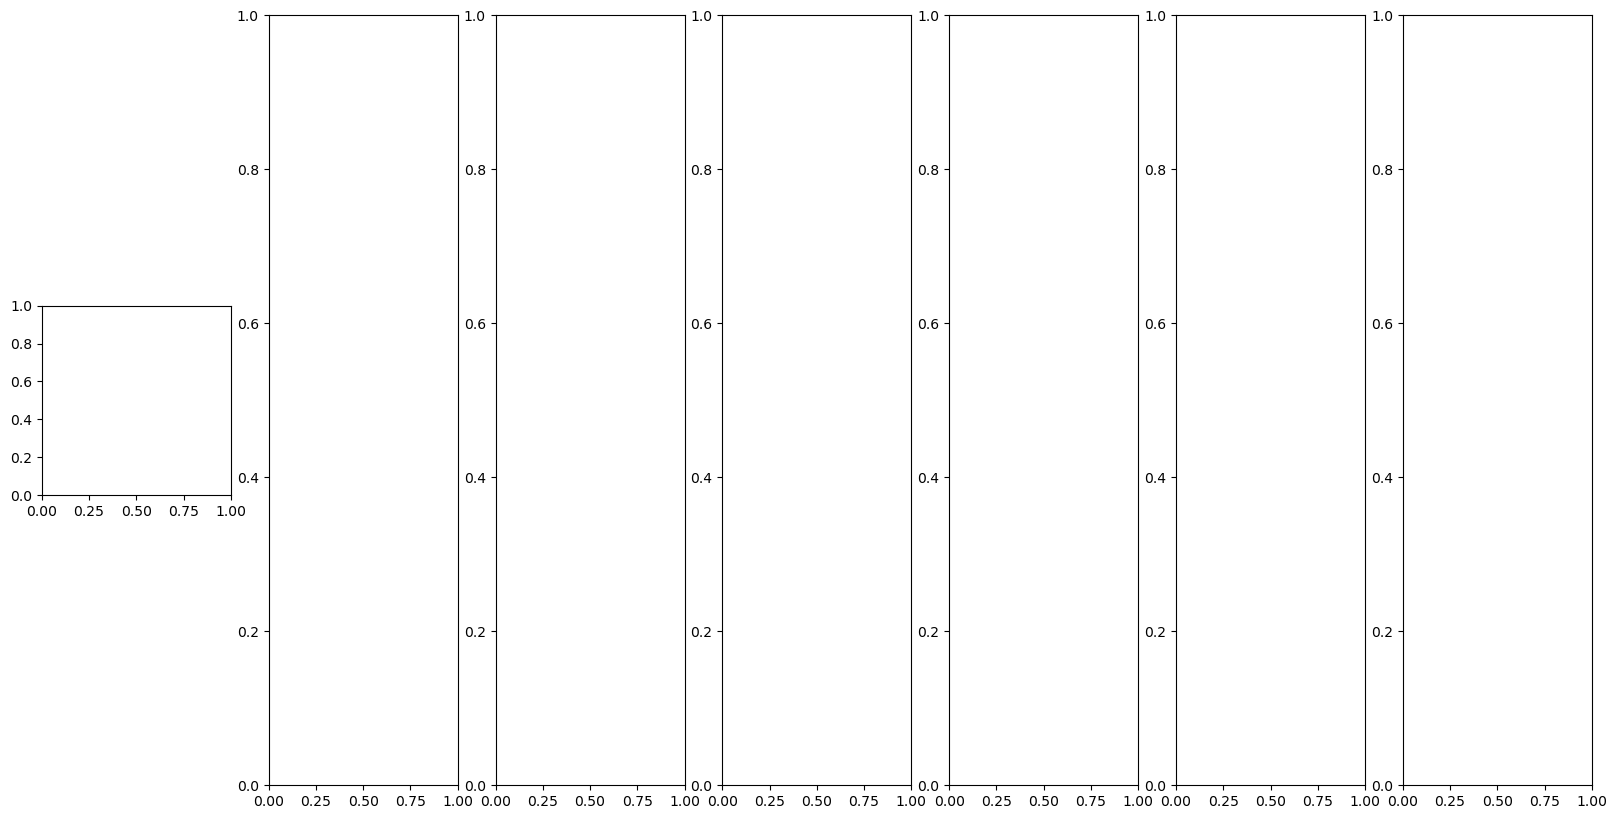

In [31]:
fig, ax = plt.subplots(1,7, figsize = (20,10))
ax[0].imshow(y)
for i in range(6):
    ax[i+1].imshow(yhat[:,:, i])